# Decision Tree Lab

In [16]:
# Importing the required packages 
import numpy as np 
import pandas as pd
import graphviz 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
from sklearn import neighbors, datasets, tree
from sklearn.metrics import confusion_matrix 
from sklearn.cross_validation import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

## Downloading Data Set

In [2]:
iris = datasets.load_iris()

X = iris.data[:, :4]
y = iris.target
e
pd.DataFrame(X, columns=iris['feature_names'][:4]).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Splitting Data Set

In [3]:
test_percent = .3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_percent)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

## Training Classification Decision Tree

In [5]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
#graph.render("iris") 

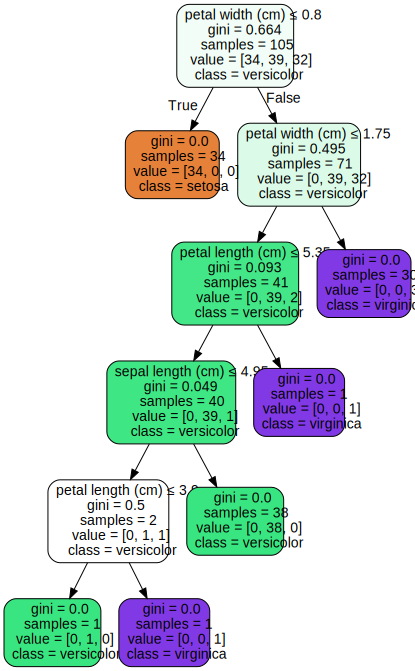

In [6]:
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=iris.feature_names, 
                                class_names=iris.target_names, filled=True, rounded=True, 
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [7]:
y_pred = clf.predict(X_test)
score = clf.score(X_test, y_test)

print("Accuracy score:",score*100,"%")

Accuracy score: 93.33333333333333 %


## Max_depth Tree

In [8]:
clf = tree.DecisionTreeClassifier(max_depth = 2)
clf = clf.fit(X_train, y_train)

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
#graph.render("iris") 

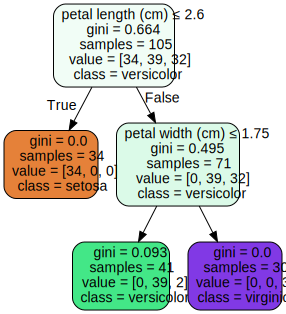

In [9]:
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=iris.feature_names, 
                                class_names=iris.target_names, filled=True, rounded=True, 
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [10]:
y_pred = clf.predict(X_test)
score = clf.score(X_test, y_test)

print("Accuracy score:",score*100,"%")

Accuracy score: 91.11111111111111 %


## Min_samples_split Tree

In [11]:
clf = tree.DecisionTreeClassifier(min_samples_split = 5)
clf = clf.fit(X_train, y_train)

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
#graph.render("iris") 

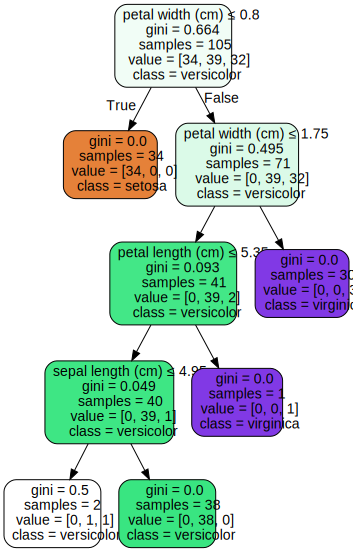

In [12]:
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=iris.feature_names, 
                                class_names=iris.target_names, filled=True, rounded=True, 
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [13]:
y_pred = clf.predict(X_test)
score = clf.score(X_test, y_test)

print("Accuracy score:",score*100,"%")

Accuracy score: 93.33333333333333 %


## Varying Parameters in the Tree

In [18]:
#for k in range(1,21,2):
    #classifier = KNeighborsClassifier(n_neighbors=k)  
    
    #classifier.fit(X_train, y_train)  

    #y_pred = classifier.predict(X_test)  

    #print("Accuracy for k =", k, " is:" ,metrics.accuracy_score(y_test, y_pred))

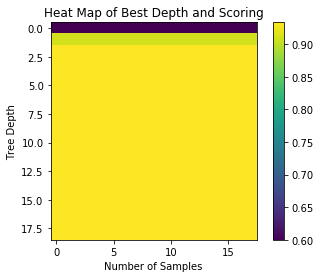

In [19]:
scoring = []

for i in range (1,20):
    for k in range (2,20):
        clf = tree.DecisionTreeClassifier(max_depth = i, min_samples_split = k)
        clf = clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        #print("Score for depth:", i, "and samples:",k, "score is:", score * 100, "%")
        
        scoring.append(score)
        
#plt.imshow(scoring)
#plt.show()

scoring
scoring = np.reshape(scoring, (19, 18))

plt.imshow(scoring)
plt.ylabel("Tree Depth")
plt.xlabel("Number of Samples")
plt.title("Heat Map of Best Depth and Scoring")
plt.colorbar()
plt.show()


## Statement of Collaboration

https://scikit-learn.org/stable/modules/tree.html
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.reshape.html